In [18]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("C:/Users/rohan/Downloads/bank-full.csv")
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [4]:
df.drop(['job','age','marital','education','balance','contact','day','month','duration','poutcome'], inplace = True, axis=1)

In [5]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})
df['default'] = df['default'].map({'yes': 1, 'no': 0})
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})


In [6]:
df.head()

default  housing  loan  campaign  pdays  previous  y
0        0        1     0         1     -1         0  0
1        0        1     0         1     -1         0  0
2        0        1     1         1     -1         0  0
3        0        1     0         1     -1         0  0
4        0        0     0         1     -1         0  0

<AxesSubplot:xlabel='y', ylabel='count'>

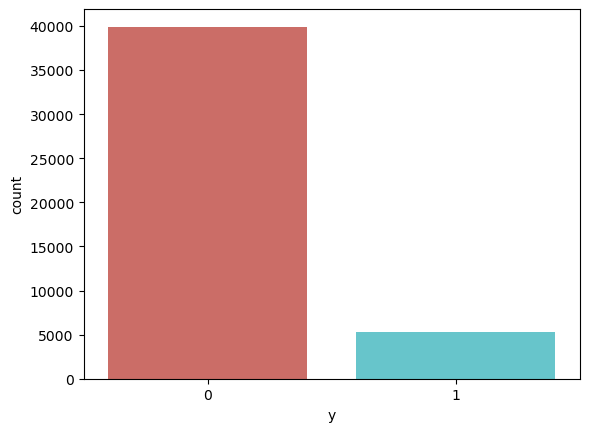

In [7]:
sns.countplot(x='y',data=df, palette='hls')

<AxesSubplot:xlabel='loan', ylabel='count'>

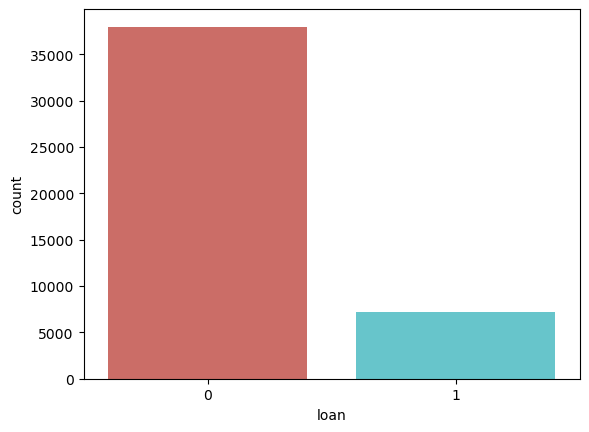

In [8]:
sns.countplot(x='loan',data=df, palette='hls')

<AxesSubplot:xlabel='housing', ylabel='count'>

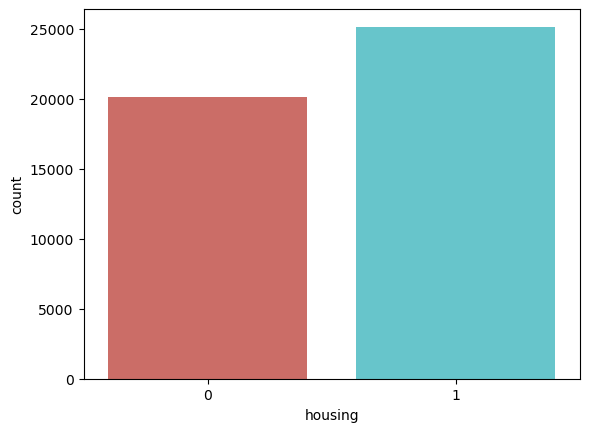

In [9]:
sns.countplot(x='housing',data=df, palette='hls')

<AxesSubplot:xlabel='default', ylabel='count'>

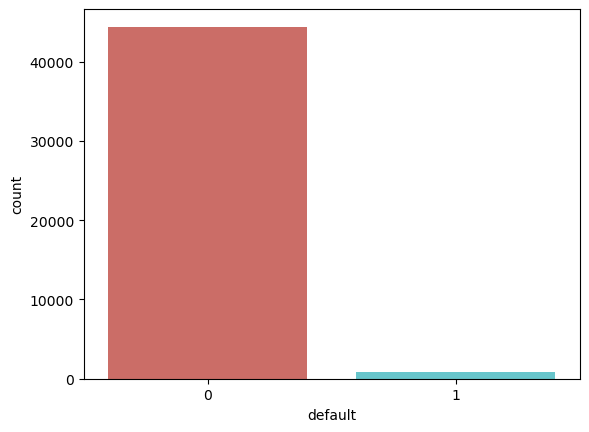

In [10]:
sns.countplot(x='default',data=df, palette='hls')


In [12]:
X = df.iloc[:,1:] ### Excluding zeroth column, every other columns is in X 
Y = df.iloc[:,0] ### Zeroth column is in Y 

In [13]:
reg = LogisticRegression()
reg.fit(X,Y)

LogisticRegression()

In [14]:
Y_pred = reg.predict(X)


In [15]:
Y_pred_df = pd.DataFrame({'actual' : Y, 'Predicted_prob' : reg.predict(X) })


In [16]:
Y_pred_df

actual  Predicted_prob
0           0               0
1           0               0
2           0               0
3           0               0
4           0               0
...       ...             ...
45206       0               0
45207       0               0
45208       0               0
45209       0               0
45210       0               0

[45211 rows x 2 columns]

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y, Y_pred)
print(cm)

[[44396     0]
 [  815     0]]


In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [25]:
fpr, tpr, thresholds = roc_curve(Y, reg.predict_proba(X)[:,1])


In [26]:
auc = roc_auc_score(Y,Y_pred)
print(auc)

0.5


Text(0, 0.5, 'true positive rate')

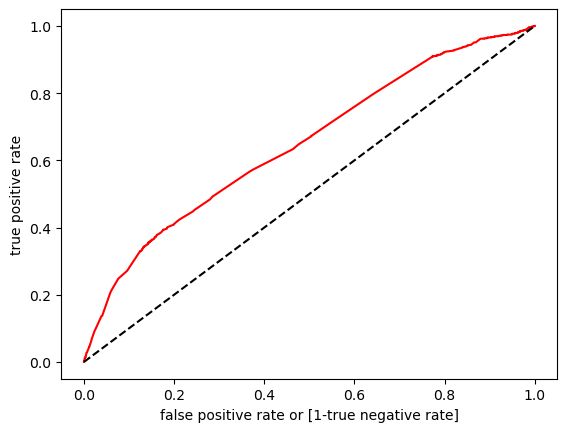

In [27]:
plt.plot(fpr, tpr, color = 'red',label='Logit model(area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('false positive rate or [1-true negative rate]')
plt.ylabel('true positive rate')

In [28]:
fpr

array([0.00000000e+00, 2.25245518e-05, 1.35147311e-04, ...,
       9.98423281e-01, 9.98468330e-01, 1.00000000e+00])

In [29]:
thresholds

array([1.11607474e+00, 1.16074739e-01, 8.91316349e-02, ...,
       2.40001311e-03, 2.39550418e-03, 7.00149295e-08])